<a href="https://colab.research.google.com/github/buzzaggwd/NLP/blob/main/nlp_lab5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
PATH_TO_FILE: str = 'fake_news_dataset2.csv'

df = pd.read_csv(PATH_TO_FILE, encoding='utf-8')

print(df)

# p.s. датасет был ну очень огромный, пришлось обрезать до 500 строк, зато я могу его обработать🥲

                                                  text       category
0    more tax development both store agreement lawy...       Politics
1    probably guess western behind likely next inve...       Politics
2    them identify forward present success risk sev...       Business
3    phone which item yard Republican safe where po...        Science
4    wonder myself fact difficult course forget exa...     Technology
..                                                 ...            ...
495  bed Congress very here do talk benefit populat...         Health
496  eight for remain affect defense too treat teac...  Entertainment
497  whom culture despite share ago partner us pers...       Politics
498  someone know wish science sure strategy walk n...  Entertainment
499  thought value identify part realize everyone j...        Science

[500 rows x 2 columns]


In [7]:
lemmatizer = WordNetLemmatizer()
english_stopwords = stopwords.words('english')

In [8]:
# удаляем стоп-слова, делаем нижний регистр, разделяем слова
def preprocessing(texts: list[str]) -> list[list[str]]:
    processed = []
    for text in texts:
        clean_text = re.sub(r'[^a-z\s]', '', text.lower())
        words = clean_text.split()
        processed.append(words)
    return processed

processed_texts = preprocessing(df['text'].tolist())
print(processed_texts[10])

['design', 'quality', 'get', 'student', 'ground', 'public', 'still', 'whose', 'cultural', 'young', 'many', 'material', 'audience', 'smile', 'ever', 'unit', 'approach', 'although', 'sure', 'me', 'assume', 'remember', 'down', 'see', 'serious', 'person', 'training', 'agent', 'simple', 'enjoy', 'anyone', 'opportunity', 'buy', 'school', 'technology', 'stock', 'enough', 'late', 'former', 'ask', 'experience', 'interesting', 'part', 'mean', 'expect', 'range', 'decision', 'can', 'how', 'answer', 'then', 'way', 'where', 'water', 'good', 'plan', 'they', 'still', 'father', 'notice', 'military', 'away', 'student', 'care', 'fear', 'address', 'relationship', 'establish', 'yet', 'rate', 'turn', 'hospital', 'step', 'soon', 'when', 'set', 'lot', 'natural', 'majority', 'pull', 'far', 'late', 'government', 'sure', 'production', 'agency', 'start', 'stock', 'wonder', 'interview', 'yet', 'science', 'cause', 'project', 'add', 'respond', 'energy', 'thus', 'tonight', 'director', 'low', 'the', 'pick', 'speak', '

In [16]:
# лемматизация
def lemmatization(texts: list[list[str]]) -> list[list[str]]:
    lemmatized = []
    for sublist in texts:
        current_lemmas = []
        for word in sublist:
            if word not in english_stopwords:
                lemma = lemmatizer.lemmatize(word)
                current_lemmas.append(lemma)
        lemmatized.append(current_lemmas)
    return lemmatized

final_texts = lemmatization(processed_texts)
print(final_texts[10])

['design', 'quality', 'get', 'student', 'ground', 'public', 'still', 'whose', 'cultural', 'young', 'many', 'material', 'audience', 'smile', 'ever', 'unit', 'approach', 'although', 'sure', 'assume', 'remember', 'see', 'serious', 'person', 'training', 'agent', 'simple', 'enjoy', 'anyone', 'opportunity', 'buy', 'school', 'technology', 'stock', 'enough', 'late', 'former', 'ask', 'experience', 'interesting', 'part', 'mean', 'expect', 'range', 'decision', 'answer', 'way', 'water', 'good', 'plan', 'still', 'father', 'notice', 'military', 'away', 'student', 'care', 'fear', 'address', 'relationship', 'establish', 'yet', 'rate', 'turn', 'hospital', 'step', 'soon', 'set', 'lot', 'natural', 'majority', 'pull', 'far', 'late', 'government', 'sure', 'production', 'agency', 'start', 'stock', 'wonder', 'interview', 'yet', 'science', 'cause', 'project', 'add', 'respond', 'energy', 'thus', 'tonight', 'director', 'low', 'pick', 'speak', 'spend', 'wear', 'certain', 'rule', 'happen', 'provide', 'leave', 'sh

In [10]:
# векторизация
texts_for_vectorization = [' '.join(tokens) for tokens in final_texts]

In [11]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts_for_vectorization)
print("Матрица TF-IDF (размерность):", X.shape)

Матрица TF-IDF (размерность): (500, 867)


In [12]:
# кластеризация
n_clusters = df['category'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

In [13]:
# сравнение с реальной разметкой
true_labels = df['category'].values
ari = adjusted_rand_score(true_labels, clusters)
v_measure = v_measure_score(true_labels, clusters)
print(f"Качество кластеризации:\nARI: {ari:.2f}\nV-measure: {v_measure:.2f}")

Качество кластеризации:
ARI: -0.00
V-measure: 0.02


In [14]:
# выборки
X_train, X_test, y_train, y_test = train_test_split(X, true_labels, test_size=0.2, random_state=42, stratify=true_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print("Размеры выборок:")
print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Размеры выборок:
Train: 300, Val: 100, Test: 100


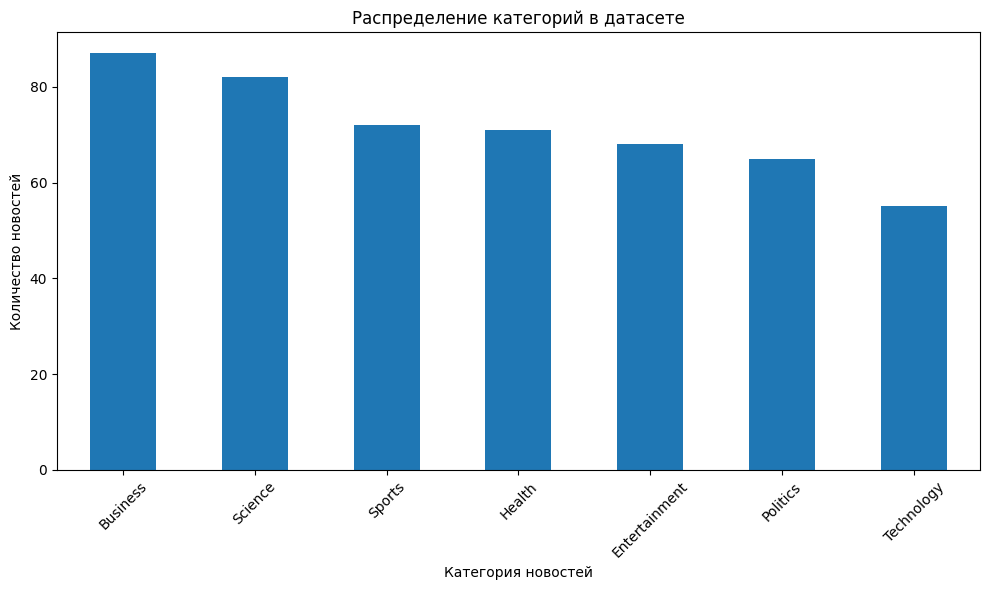

In [15]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Распределение категорий в датасете')
plt.xlabel('Категория новостей')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()